## Número de Condición

Consideramos 2 matrices, $A_1$ y $A_2$, con números de condición $\kappa(A_1)\approx 1$, y $\kappa(A_2)\gg 1$.

Vamos a ver que al añadir una ligera perturbación al vector $b$ (que podría ser propia de una incerteza de los datos), la solución cambia drásticamente en uno de los casos y el otro no.

In [1]:
import numpy as np

# Matriz bien condicionada
A1 = np.array([[3, 1],
               [1, 2]], dtype=float)
b1 = np.array([5, 5], dtype=float)

# Matriz mal condicionada
A2 = np.array([[1, 1],
               [1, 1.0001]], dtype=float)
b2 = np.array([2, 2.0001], dtype=float)

# Resuelvo
x1 = np.linalg.solve(A1, b1)
x2 = np.linalg.solve(A2, b2)

# Calculo números de condición
cond1 = np.linalg.cond(A1) # por default elige la norma 2
cond2 = np.linalg.cond(A2)

# Perturbamos b levemente
delta = 1e-4
b1_pert = b1 + np.array([0, delta])
b2_pert = b2 + np.array([0, delta])

x1_pert = np.linalg.solve(A1, b1_pert)
x2_pert = np.linalg.solve(A2, b2_pert)

# Calculamos error relativo
rel_error_b1 = np.linalg.norm(b1_pert - b1) / np.linalg.norm(b1)
rel_error_x1 = np.linalg.norm(x1_pert - x1) / np.linalg.norm(x1)


rel_error_b2 = np.linalg.norm(b2_pert - b2) / np.linalg.norm(b2)
rel_error_x2 = np.linalg.norm(x2_pert - x2) / np.linalg.norm(x2)

print("Matriz bien condicionada:")
print(f"Número de condición: {cond1:.2e}")
print(f"Solución: {x1}")
print(f"Solución perturbada {x1_pert}")
print(f"Error relativo en b: {rel_error_b1:.2e}")
print(f"Error relativo en x: {rel_error_x1:.2e} \n")


print("Matriz mal condicionada:")
print(f"Número de condición: {cond2:.2e}")
print(f"Solución: {x2}")
print(f"Solución perturbada {x2_pert}")
print(f"Error relativo en b: {rel_error_b2:.2e}")
print(f"Error relativo en x: {rel_error_x2:.2e} \n")


Matriz bien condicionada:
Número de condición: 2.62e+00
Solución: [1. 2.]
Solución perturbada [0.99998 2.00006]
Error relativo en b: 1.41e-05
Error relativo en x: 2.83e-05 

Matriz mal condicionada:
Número de condición: 4.00e+04
Solución: [1. 1.]
Solución perturbada [-4.4408921e-12  2.0000000e+00]
Error relativo en b: 3.54e-05
Error relativo en x: 1.00e+00 



# Método de Jacobi

Queremos resolver el sistema lineal $A\mathbf {x} =\mathbf {b} $.

Podemos descomponer a $A$ de la siguente manera

$ A=D-L-U\qquad {\text{donde}}\qquad D={\begin{bmatrix}a_{11}&0&\cdots &0\\0&a_{22}&\cdots &0\\\vdots &\vdots &\ddots &\vdots \\0&0&\cdots &a_{nn}\end{bmatrix}}{\text{ y }}L+U={\begin{bmatrix}0&-a_{12}&\cdots &-a_{1n}\\-a_{21}&0&\cdots &-a_{2n}\\\vdots &\vdots &\ddots &\vdots \\-a_{n1}&-a_{n2}&\cdots &0\end{bmatrix}}.$

No conocemos $\mathbf{x}$ y queremos aproximarlo, por lo que vamos a elegir un vector inicial $\mathbf {x} ^{(0)}$ y buscar iterativamente la solución.
Llamamos $\mathbf {x} ^{(k)}$ a la k-ésima aproximación o iteración de $\mathbf {x}$.

La solución por el método de Jacobi se obtiene mediante la fórmula

$\mathbf {x} ^{(k+1)}=D^{-1}(\mathbf {b} +(L+U)\mathbf {x} ^{(k)}),$

que si se la piensa por elemento se puede escribir como

$ x_{i}^{(k+1)}={\frac {1}{a_{ii}}}\left(b_{i}-\sum _{j\neq i}a_{ij}x_{j}^{(k)}\right),\quad i=1,2,\ldots ,n.$

Es importante notar que para conseguir $x_{i}^{(k+1)}$ se necesitan todos los elementos de $\mathbf {x} ^{(k)}$, salvo el i-ésimo, por lo que no podemos re-escribir $x_{i}^{(k)}$ por $x_{i}^{(k+1)}$. Necesitamos al menos dos vectores de tamaño $n$.

In [10]:
import matplotlib.pyplot as plt


def jacobi(A, b, x0, tol=1e-8, max_iter=1000):
    """
    Resuelve el sistema lineal Ax = b usando el método iterativo de Jacobi.
    A: Matriz de coeficientes
    b: Vector de constantes
    x0: Valor inicial de la solución
    tol: Tolerancia de la convergencia
    max_iter: Cantidad de iteraciones máximas permitidas
    """
    x = x0.copy()
    x_history = [x0]
    for k in range(max_iter):
        x_new = np.zeros_like(x)

        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        dif = np.linalg.norm(x - x_new)
        x_history.append(x_new)

        if dif < tol:
            return x_history, k
        x = x_new

    print("No se alcanzó la tolerancia deseada")
    return x_history, k


Ejemplo:

Diferencia entre sol. analítica e iterativa: 1.3765093634032324e-15
Cantidad de iteraciones: 38


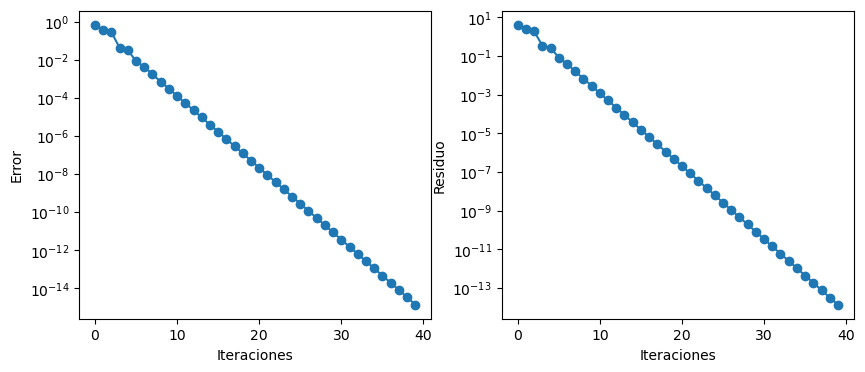

[ 0.03508772 -0.23684211  0.65789474]


In [12]:
A = np.array([[3, -1, 1],
              [3,  6, 2],
              [3,  3, 7]])
b = np.array([1, 0 , 4])

#Comparo con solución exacta
solucion = ([2/57, -9/38, 25/38])

x0 = np.array([0., 0., 0.])
x_hist, iters = jacobi(A, b, x0,tol=1e-14, max_iter=100)

#Calculo residuo y error de cada iteración
res = []
err = []

for x_k in x_hist:
    res.append(np.linalg.norm(A@x_k - b))
    err.append(np.linalg.norm(solucion-x_k))


print("Diferencia entre sol. analítica e iterativa:", err[-1])
print(f'Cantidad de iteraciones:', iters)

plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
plt.plot(err, '-o')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(res, '-o')
plt.xlabel('Iteraciones')
plt.ylabel('Residuo')
plt.yscale('log')
plt.show()

print(x_hist[-1])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def QR_GS(A):
    """Realiza descomposición QR con Gram-Schmidt clásico.
    En caso que A sea rectangular, devuelve Q de tamaño (m, n) y R de tamaño (n, n) (Reducida).

    Args:
        A: Matriz de tamaño (m, n).

    Devuelve:
        Q: Matriz ortogonal de tamaño (m, n).
        R: Matriz triangular superior de tamaño (n, n).
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

In [15]:
# Matriz A
A = np.array([[2, 4, -1],
              [-2, 0, 3],
              [1, 2, -1]], dtype=float)

Q, R = QR_GS(A)

ortogonalidad = np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))
print("\nOrtogonalidad (clásico):", ortogonalidad)

print(Q)
print(R)


Ortogonalidad (clásico): True
[[ 6.66666667e-01  5.96284794e-01  4.47213595e-01]
 [-6.66666667e-01  7.45355992e-01  1.48952049e-15]
 [ 3.33333333e-01  2.98142397e-01 -8.94427191e-01]]
[[ 3.          3.33333333 -3.        ]
 [ 0.          2.98142397  1.34164079]
 [ 0.          0.          0.4472136 ]]


In [20]:
A = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]], dtype=float) #me defino esta matriz de prueba

Q,R = QR_GS(A) #Chequeamos que nos da bien 
print(Q@R)

def eigenval_calculator(A,iterations = 1000): #pueden ver de armar un criterio mejor, por ejemplo si los elementos inferiores son todos menores a tal valor cortar o los elementos cercanos a la diagonal se hacen mas chicos que tal umbral, etc
    M = A.copy() #Voy a ir armando matrices similares M para ir iterando para hacer una matriz tridiagonal
    Q,R = QR_GS(M)
    for j in range(iterations):
       
        Q,R = QR_GS(M)
        M = R@Q #La matriz similar es R@Q por cada paso
        if j<7:
          print(f'{M}') #Esto nos ayuda a ver en los primeros 5 pasos como va quedando M
    eigenval = np.diag(M) #me quedo con un array de valores de la diagonal de M que son las aproximaciones a orden cúbico de los autovalores
    return eigenval

eigenval = np.sort(eigenval_calculator(A,20))[::-1] #calculo los autovalores usando el método y los ordeno de mayor a menor
print(f'Los autovalores con el método de QR directo son {eigenval}')
linalg_eigen = np.linalg.eigvals(A)
print(f'Los autovalores usando linalg son {linalg_eigen}')

[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
[[ 25.    11.04   9.28]
 [ 95.   146.    72.  ]
 [-10.     6.   -33.  ]]
[[ 154.65641026    9.09951252 -108.25126894]
 [  33.08755139    3.70451409    9.13989989]
 [  -2.62377524   15.80372493  -20.36092434]]
[[ 158.34304662 -102.95641779  -12.94203558]
 [   3.66631472  -16.72825249   17.59113804]
 [  -0.56011571   33.56865263   -3.61479414]]
[[ 1.55993034e+02  3.14685276e+01 -1.03041311e+02]
 [ 8.74162823e-01 -2.39282862e+01  2.90515340e+01]
 [-5.29365967e-02  1.37420751e+01  5.93525233e+00]]
[[ 1.56203508e+02 -7.74088556e+01 -7.42194005e+01]
 [ 1.63254306e-01 -3.54078985e+01 -6.05997500e+00]
 [-6.72168000e-03  9.81598367e+00  1.72043908e+01]]
[[ 1.56125760e+02  5.49146122e+01 -9.22831450e+01]
 [ 3.78732879e-02 -3.25521856e+01  1.98022275e+01]
 [-6.44294628e-04  4.00717804e+00  1.44264259e+01]]
[[ 1.56139460e+02 -6.57284296e+01 -8.48854822e+01]
 [ 8.03331945e-03 -3.47534717e+01 -1.37727426e+01]
 [-6.90793196e-05  2.04446595e+00  1